In [10]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  
import matplotlib.pyplot as plt
%matplotlib inline

C:\Code\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
import nltk
nltk.download('stopwords')

C:\Code\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to C:\Users\Mridul
[nltk_data]     Ahuja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

C:\Code\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Code\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df = pd.read_csv("C:\\Users\\Mridul Ahuja\\Downloads\\cleaned_ver4.csv")

In [8]:
df.shape

(2811774, 2)

In [5]:
df2 = df.head(20000)

In [6]:
df2.shape

(20000, 2)

In [7]:
data = df2.cleaned_text.values.tolist()

In [8]:
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [9]:
data

['115712 understand would assist would need private secure link assist',
 'sprintcare propose',
 'sprintcare sent several private message one respond usual',
 '115712 send private message assist click ‘ message top profile',
 'sprintcare',
 '115712 send private message gain detail account',
 'sprintcare bad customer service',
 '115713 sadden hear shoot look kc',
 'sprintcare gon na magically change connectivity whole family 🤥 💯',
 '115713 understand concern wed send direct message assist aa',
 'sprintcare since sign yousince day 1',
 '115713 h wed definitely work long experience issue aa',
 '115714 lie “ great ” connection 5 bar lte still load something smh',
 '115715 send private message send link access account fr',
 '115714 whenever contact customer support tell shortcode enable account never 4 year ive try httpstco0g98rtnxpk',
 '115716 information incorrect jk',
 'askspectrum would email copy one since spectrum update training',
 '115716 department part corporate office youre parti

In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['understand', 'would', 'assist', 'would', 'need', 'private', 'secure', 'link', 'assist']]


In [11]:
data_words

[['understand',
  'would',
  'assist',
  'would',
  'need',
  'private',
  'secure',
  'link',
  'assist'],
 ['sprintcare', 'propose'],
 ['sprintcare',
  'sent',
  'several',
  'private',
  'message',
  'one',
  'respond',
  'usual'],
 ['send',
  'private',
  'message',
  'assist',
  'click',
  'message',
  'top',
  'profile'],
 ['sprintcare'],
 ['send', 'private', 'message', 'gain', 'detail', 'account'],
 ['sprintcare', 'bad', 'customer', 'service'],
 ['sadden', 'hear', 'shoot', 'look', 'kc'],
 ['sprintcare',
  'gon',
  'na',
  'magically',
  'change',
  'connectivity',
  'whole',
  'family'],
 ['understand', 'concern', 'wed', 'send', 'direct', 'message', 'assist', 'aa'],
 ['sprintcare', 'since', 'sign', 'yousince', 'day'],
 ['wed', 'definitely', 'work', 'long', 'experience', 'issue', 'aa'],
 ['lie',
  'great',
  'connection',
  'bar',
  'lte',
  'still',
  'load',
  'something',
  'smh'],
 ['send', 'private', 'message', 'send', 'link', 'access', 'account', 'fr'],
 ['whenever',
  'con

In [12]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['understand', 'would', 'assist', 'would', 'need', 'private', 'secure', 'link', 'assist']


In [83]:
i=0
for word in data_words:
    if(len(word)>len(trigram_mod[bigram_mod[data_words[i]]])):
        print(word)
        print(trigram_mod[bigram_mod[data_words[i]]])
    i = i+1

['sprintcare', 'sent', 'several', 'private', 'message', 'one', 'respond', 'usual']
['sprintcare', 'sent', 'several', 'private_message', 'one', 'respond', 'usual']
['send', 'private', 'message', 'assist', 'click', 'message', 'top', 'profile']
['send', 'private_message', 'assist', 'click', 'message', 'top', 'profile']
['send', 'private', 'message', 'gain', 'detail', 'account']
['send', 'private_message', 'gain', 'detail', 'account']
['sprintcare', 'gon', 'na', 'magically', 'change', 'connectivity', 'whole', 'family']
['sprintcare', 'gon_na', 'magically', 'change', 'connectivity', 'whole', 'family']
['understand', 'concern', 'wed', 'send', 'direct', 'message', 'assist', 'aa']
['understand', 'concern', 'wed', 'send', 'direct_message_assist', 'aa']
['send', 'private', 'message', 'send', 'link', 'access', 'account', 'fr']
['send', 'private_message', 'send', 'link', 'access', 'account', 'fr']
['apologize', 'inconvenience', 'glad', 'assist', 'name', 'acct', 'phone', 'jb']
['apologize_inconveni

['marksandspencer_tesco_sainsburys_aldiuk', 'morrison', 'award', 'prize', 'best', 'nationwide', 'mince_pie', 'available', 'across', 'uk', 'marksandspencer', 'collection', 'mince_pie', 'luxury', 'mince_pie', 'well', 'do', 'mincepiewars']
['marksandspencer', 'tesco', 'sainsburys', 'aldiuk', 'morrison', 'tomorrow', 'hope', 'look', 'back', 'competition', 'share', 'taste', 'note', 'pie', 'test', 'mincepiewars']
['marksandspencer_tesco_sainsburys_aldiuk', 'morrison', 'tomorrow', 'hope', 'look', 'back', 'competition', 'share', 'taste', 'note', 'pie', 'test', 'mincepiewars']
['marksandspencer', 'tesco', 'sainsburys', 'aldiuk', 'morrison', 'look', 'forward']
['marksandspencer_tesco_sainsburys_aldiuk', 'morrison', 'look', 'forward']
['marksandspencer', 'tesco', 'sainsburys', 'aldiuk', 'morrison', 'celebrate', 'magnificent', 'competition', 'booth', 'stollen', 'bite', 'also', 'triumph', 'httpstco', 'fcv', 'sstkx']
['marksandspencer_tesco_sainsburys_aldiuk', 'morrison', 'celebrate', 'magnificent', 

['chipotletweets', 'tonight', 'halloween', 'promo', 'burrito_bowl', 'well']
['ha', 'legit', 'make', 'laugh', 'loud', 'well', 'played', 'friend', 'becky']
['ha', 'legit', 'make', 'laugh', 'loud', 'well', 'played_friend', 'becky']
['thats', 'concern', 'apology', 'tell', 'httpstcoax', 'dx', 'becky']
['thats', 'concern', 'apology', 'tell_httpstcoax', 'dx_becky']
['shouldnt', 'happen', 'provide', 'detail', 'httpstcoax', 'dx', 'becky']
['shouldnt', 'happen', 'provide', 'detail_httpstcoax_dx', 'becky']
['realize', 'chipotle', 'charge', 'buck', 'wear', 'costume', 'chipotletweets']
['realize', 'chipotle', 'charge', 'buck', 'wear_costume', 'chipotletweets']
['thank', 'loyalty', 'nick', 'look', 'forward', 'welcome', 'onboard', 'soon', 'lc']
['thank', 'loyalty', 'nick', 'look', 'forward', 'welcome_onboard', 'soon', 'lc']
['well', 'sure', 'share', 'along', 'team', 'ramana', 'feel', 'free', 'add', 'anything', 'youd', 'see', 'httpstcon', 'qdfjdbfr']
['well', 'sure', 'share', 'along', 'team', 'ramana'

['apology', 'bad', 'experience', 'share', 'detail', 'well', 'touch', 'appreciate_patience', 'ak']
['im', 'trouble', 'fill', 'form', 'httpstcobeaadm', 'muc', 'contact', 'early', 'au']
['im', 'trouble', 'fill_form_httpstcobeaadm_muc', 'contact', 'early', 'au']
['sent', 'correspondence', 'register', 'email', 'id', 'check', 'replyah']
['sent', 'correspondence_register', 'email', 'id', 'check', 'replyah']
['provide', 'detail', 'consider', 'personal', 'information', 'twitter', 'page', 'visible', 'public', 'yp']
['provide', 'detail_consider', 'personal_information_twitter_page', 'visible_public', 'yp']
['case', 'fill', 'form', 'well', 'reach', 'vn']
['case', 'fill_form', 'well', 'reach', 'vn']
['team', 'sent', 'correspondence', 'kindly', 'check', 'httpstco', 'dac', 'ww', 'ap']
['team', 'sent', 'correspondence', 'kindly', 'check', 'httpstco', 'dac_ww', 'ap']
['im', 'afraid', 'havent', 'receive', 'writeback', 'aadil', 'respond', 'late', 'correspondence']
['im', 'afraid', 'havent_receive', 'writ

['magentaman', 'thank', 'much', 'head', 'anything_else', 'would', 'share', 'waqarsheraz']
['hey', 'charley', 'know', 'valuable', 'time', 'still', 'need', 'assistance', 'feel', 'free', 'send', 'channeyt']
['hey', 'charley', 'know', 'valuable', 'time', 'still', 'need', 'assistance', 'feel_free', 'send', 'channeyt']
['corey', 'would', 'really', 'service', 'plz', 'phone', 'number', 'address', 'chat', 'dt']
['corey', 'would', 'really', 'service', 'plz', 'phone', 'number', 'address', 'chat_dt']
['good', 'morning', 'would', 'really', 'service', 'plz', 'phone', 'number', 'address', 'chat', 'dt']
['good', 'morning', 'would', 'really', 'service', 'plz', 'phone', 'number', 'address', 'chat_dt']
['chess', 'inconvenience', 'cause', 'train', 'run', 'minute', 'late', 'alter', 'due', 'congestion', 'mb']
['chess', 'inconvenience_cause', 'train', 'run', 'minute', 'late', 'alter', 'due', 'congestion', 'mb']
['direct', 'message', 'grace', 'kindly', 'provide', 'guest', 'passport', 'copy', 'verify', 'necess

In [17]:
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2)]]


In [18]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('assist', 2),
  ('link', 1),
  ('need', 1),
  ('private', 1),
  ('secure', 1),
  ('understand', 1),
  ('would', 2)]]

In [19]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [20]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.205*"number" + 0.124*"back" + 0.065*"hello" + 0.062*"give" + '
  '0.057*"follow" + 0.047*"pay" + 0.044*"internet" + 0.039*"year" + '
  '0.033*"home" + 0.029*"tweet"'),
 (1,
  '0.223*"store" + 0.113*"im" + 0.084*"come" + 0.063*"hey" + 0.055*"even" + '
  '0.054*"find" + 0.042*"already" + 0.037*"week" + 0.032*"ill" + 0.030*"open"'),
 (2,
  '0.202*"account" + 0.202*"send" + 0.160*"use" + 0.088*"link" + '
  '0.031*"access" + 0.028*"sprintcare" + 0.027*"sign" + 0.022*"someone" + '
  '0.018*"extra" + 0.014*"food"'),
 (3,
  '0.142*"service" + 0.130*"phone" + 0.093*"customer" + 0.076*"happy" + '
  '0.060*"askspectrum" + 0.057*"apology" + 0.054*"great" + 0.042*"name" + '
  '0.041*"bad" + 0.040*"apologize"'),
 (4,
  '0.207*"location" + 0.000*"team" + 0.000*"leadership" + 0.000*"visit" + '
  '0.000*"feedback" + 0.000*"always" + 0.000*"available" + 0.000*"let" + '
  '0.000*"kindly" + 0.000*"close"'),
 (5,
  '0.247*"issue" + 0.130*"assist" + 0.073*"line" + 0.065*"experience" + '
  '0.058*"

In [21]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -20.938860359809325

Coherence Score:  0.3474496295045143


In [23]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.1506,"time, would, see, trouble, understand, arrive,...","[understand, would, assist, would, need, priva..."
1,1,2.0,0.1098,"account, send, use, link, access, sprintcare, ...","[sprintcare, propose]"
2,2,9.0,0.2913,"get, one, try, message, target, also, sent, th...","[sprintcare, sent, several, private, message, ..."
3,3,5.0,0.1871,"issue, assist, line, experience, long, people,...","[send, private, message, assist, click, messag..."
4,4,2.0,0.1098,"account, send, use, link, access, sprintcare, ...",[sprintcare]
5,5,9.0,0.1378,"get, one, try, message, target, also, sent, th...","[send, private, message, gain, detail, account]"
6,6,3.0,0.2074,"service, phone, customer, happy, askspectrum, ...","[sprintcare, bad, customer, service]"
7,7,17.0,0.2298,"look, httpstco, hear, able, anything, stop, sh...","[sadden, hear, shoot, look, kc]"
8,8,14.0,0.2449,"make, detail, change, way, thing, point, na, h...","[sprintcare, gon, na, magically, change, conne..."
9,9,19.0,0.1460,"day, wed, since, month, much, every, forward, ...","[understand, concern, wed, send, direct, messa..."


In [97]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Tweet_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(15)

,Tweet_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.1506,"time, would, see, trouble, understand, arrive, nice, amazonhelp, let, check","[understand, would, assist, would, need, private, secure, link, assist]"
1,1,2.0,0.1098,"account, send, use, link, access, sprintcare, sign, someone, extra, food","[sprintcare, propose]"
2,2,9.0,0.2913,"get, one, try, message, target, also, sent, thats, respond, definitely","[sprintcare, sent, several, private, message, one, respond, usual]"
3,3,5.0,0.1871,"issue, assist, line, experience, long, people, click, kind, top, profile","[send, private, message, assist, click, message, top, profile]"
4,4,2.0,0.1098,"account, send, use, link, access, sprintcare, sign, someone, extra, food",[sprintcare]
5,5,9.0,0.1378,"get, one, try, message, target, also, sent, thats, respond, definitely","[send, private, message, gain, detail, account]"
6,6,3.0,0.2074,"service, phone, customer, happy, askspectrum, apology, great, name, bad, apologize","[sprintcare, bad, customer, service]"
7,7,17.0,0.2298,"look, httpstco, hear, able, anything, stop, shoot, rule, kc, amazonhelp","[sadden, hear, shoot, look, kc]"
8,8,14.0,0.2449,"make, detail, change, way, thing, point, na, hopefully, whole, family","[sprintcare, gon, na, magically, change, connectivity, whole, family]"
9,9,19.0,0.1460,"day, wed, since, month, much, every, forward, direct, per, picture","[understand, concern, wed, send, direct, message, assist, aa]"


In [98]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(15)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.3080,"number, back, hello, give, follow, pay, internet, year, home, tweet","[verizonsupport, friend, without, internet, need, play, videogames, together, skill, diminish, e..."
1,1.0,0.3164,"store, im, come, hey, even, find, already, week, ill, open","[hey, chipotletweets, wan, na, come, mammoth, ill, least, eat, week, promise]"
2,2.0,0.2474,"account, send, use, link, access, sprintcare, sign, someone, extra, food","[amazonhelp, look, signinform, say, dont, account, cant, access, account, skip, sign, use]"
3,3.0,0.3451,"service, phone, customer, happy, askspectrum, apology, great, name, bad, apologize","[yo, askspectrum, customer, service, rep, super, nice, imma, start, trippin, service, go]"
4,5.0,0.2267,"issue, assist, line, experience, long, people, click, kind, top, profile","[chipotletweets, excellent, service, tonight, plenty, people, line, go, fast, everyone, kind]"
5,6.0,0.2414,"thank, youre, information, date, local, resolve, ever, correct, quickly, consider","[chipotletweets, thank, chipotletweets, resolve, issue, quickly, best, fanforlife]"
6,7.0,0.3119,"order, contact, dont, update, info, keep, support, free, chat, never","[info, share, moment, feel, free, keep, eye, blog, news, update]"
7,8.0,0.3048,"call, still, today, app, sure, card, charge, fix, something, help","[frustrate, chipotletweets, order, dinner, saturday, use, app, order, wrong, charge, credit, car..."
8,9.0,0.2913,"get, one, try, message, target, also, sent, thats, respond, definitely","[sprintcare, sent, several, private, message, one, respond, usual]"
9,10.0,0.1902,"time, would, see, trouble, understand, arrive, nice, amazonhelp, let, check","[see, uptime, hr, minute, see, downstream, channel, range, nearly, spec, well, see, report, upst..."


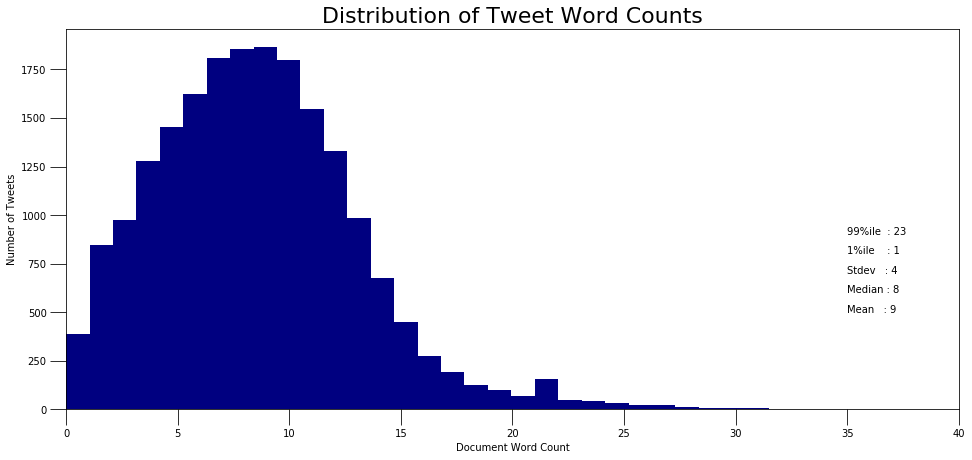

In [92]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7))
plt.hist(doc_lens, bins = 40, color='navy')
plt.text(35, 500, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(35,  600, "Median : " + str(round(np.median(doc_lens))))
plt.text(35,  700, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(35,  800, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(35,  900, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 20), ylabel='Number of Tweets', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,40,9))
plt.title('Distribution of Tweet Word Counts', fontdict=dict(size=22))
plt.show()

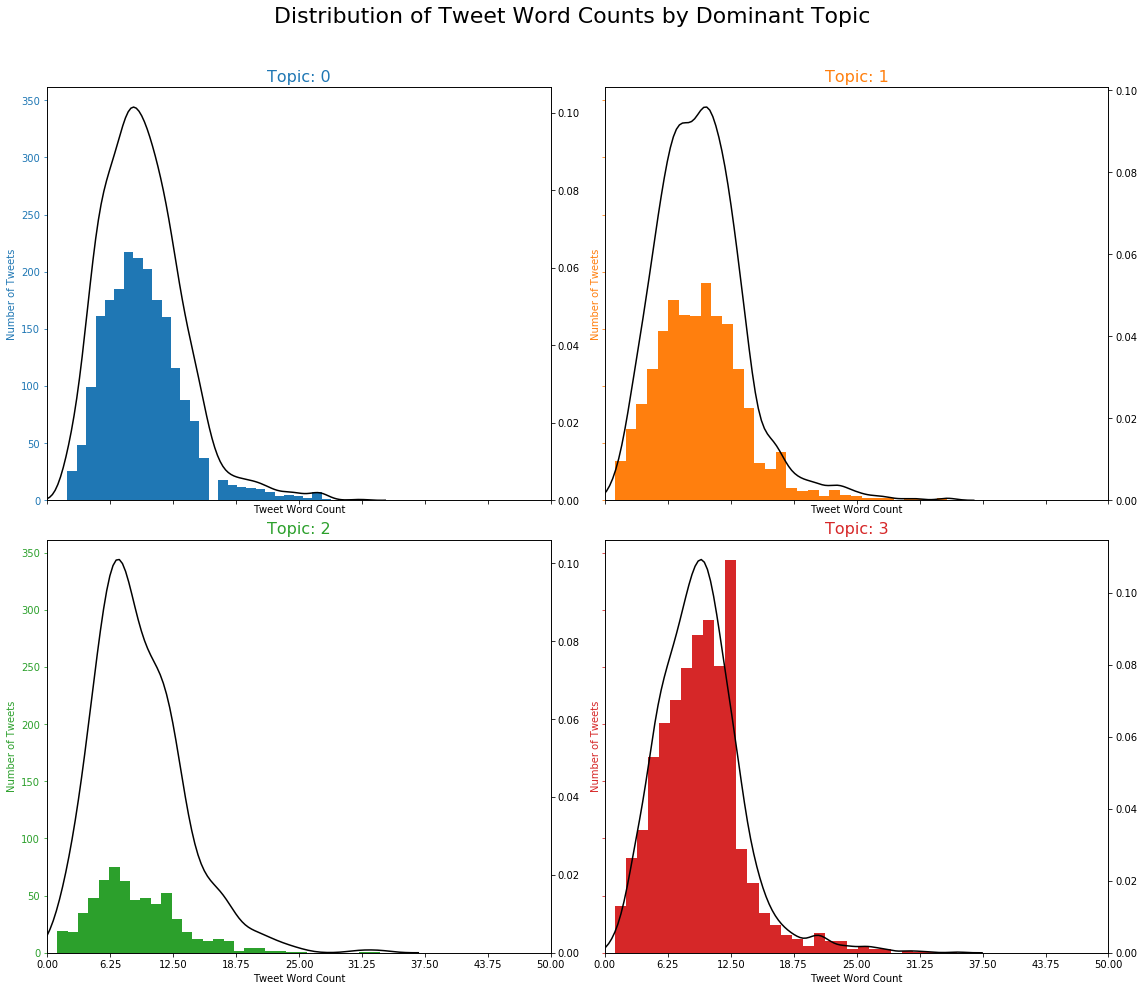

In [95]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 31, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Tweet Word Count')
    ax.set_ylabel('Number of Tweets', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Tweet Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [55]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


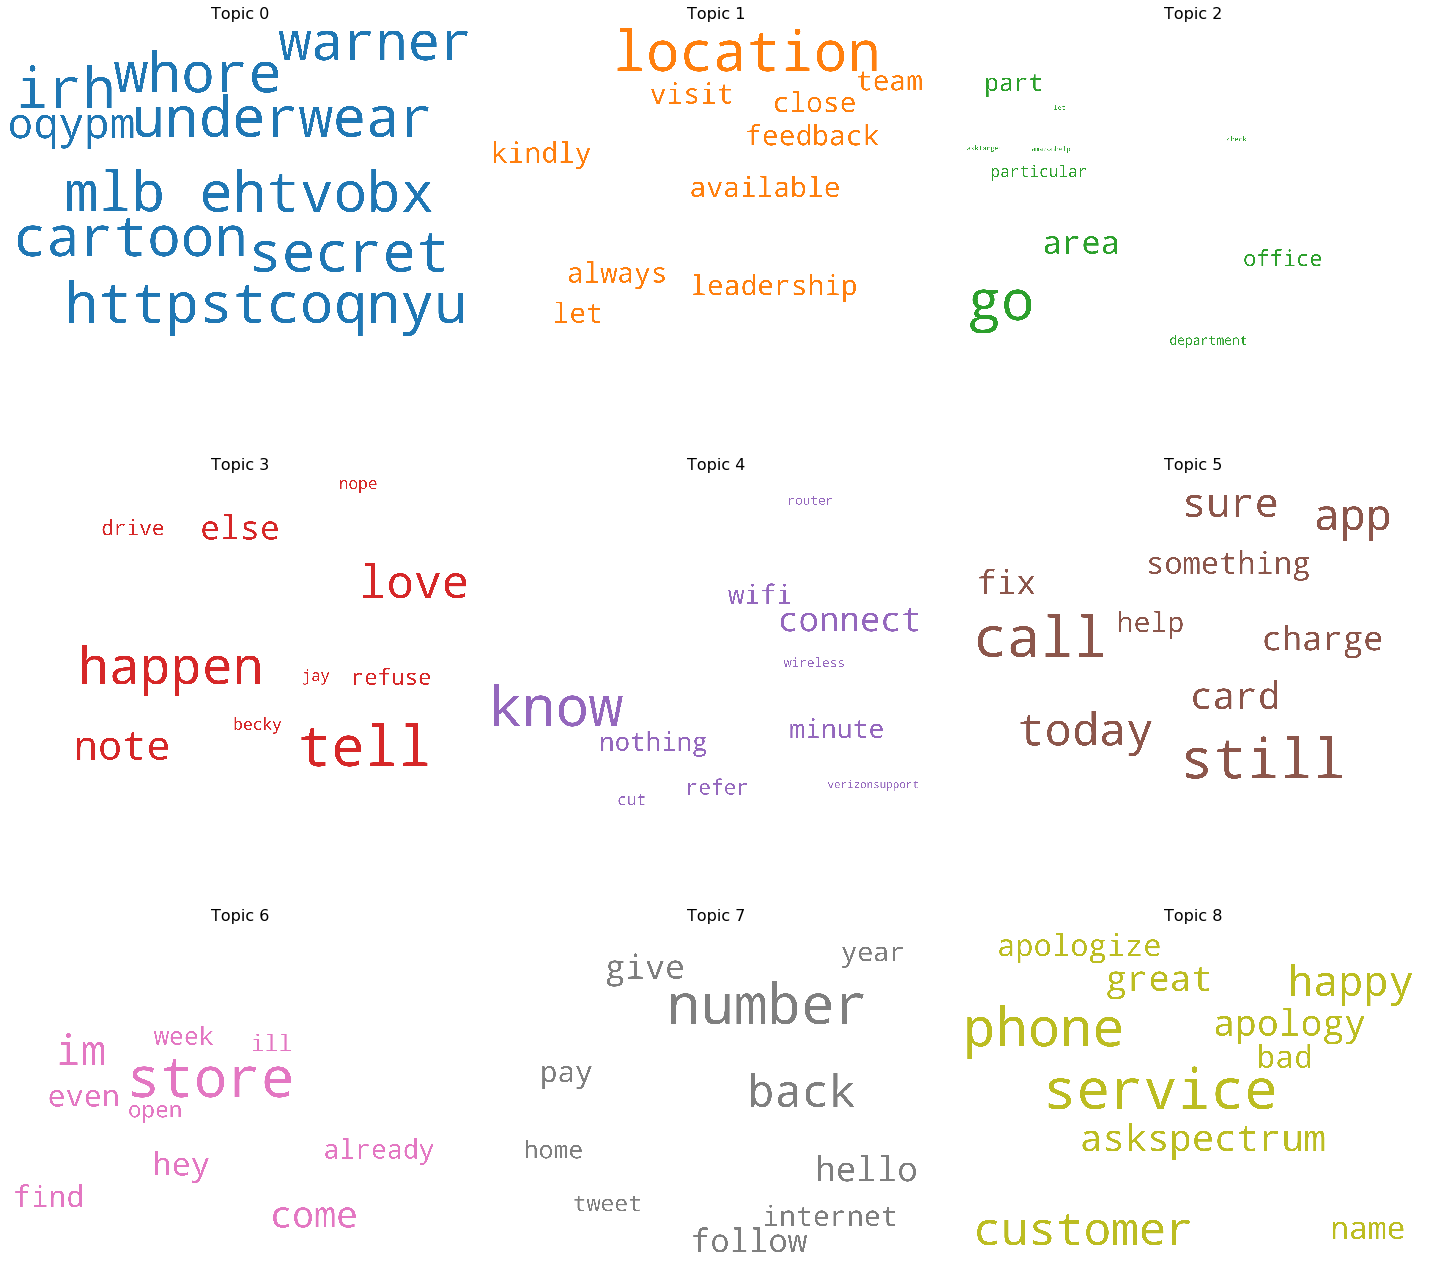

In [62]:
# 1. Wordcloud of Top N words in each topic
import wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

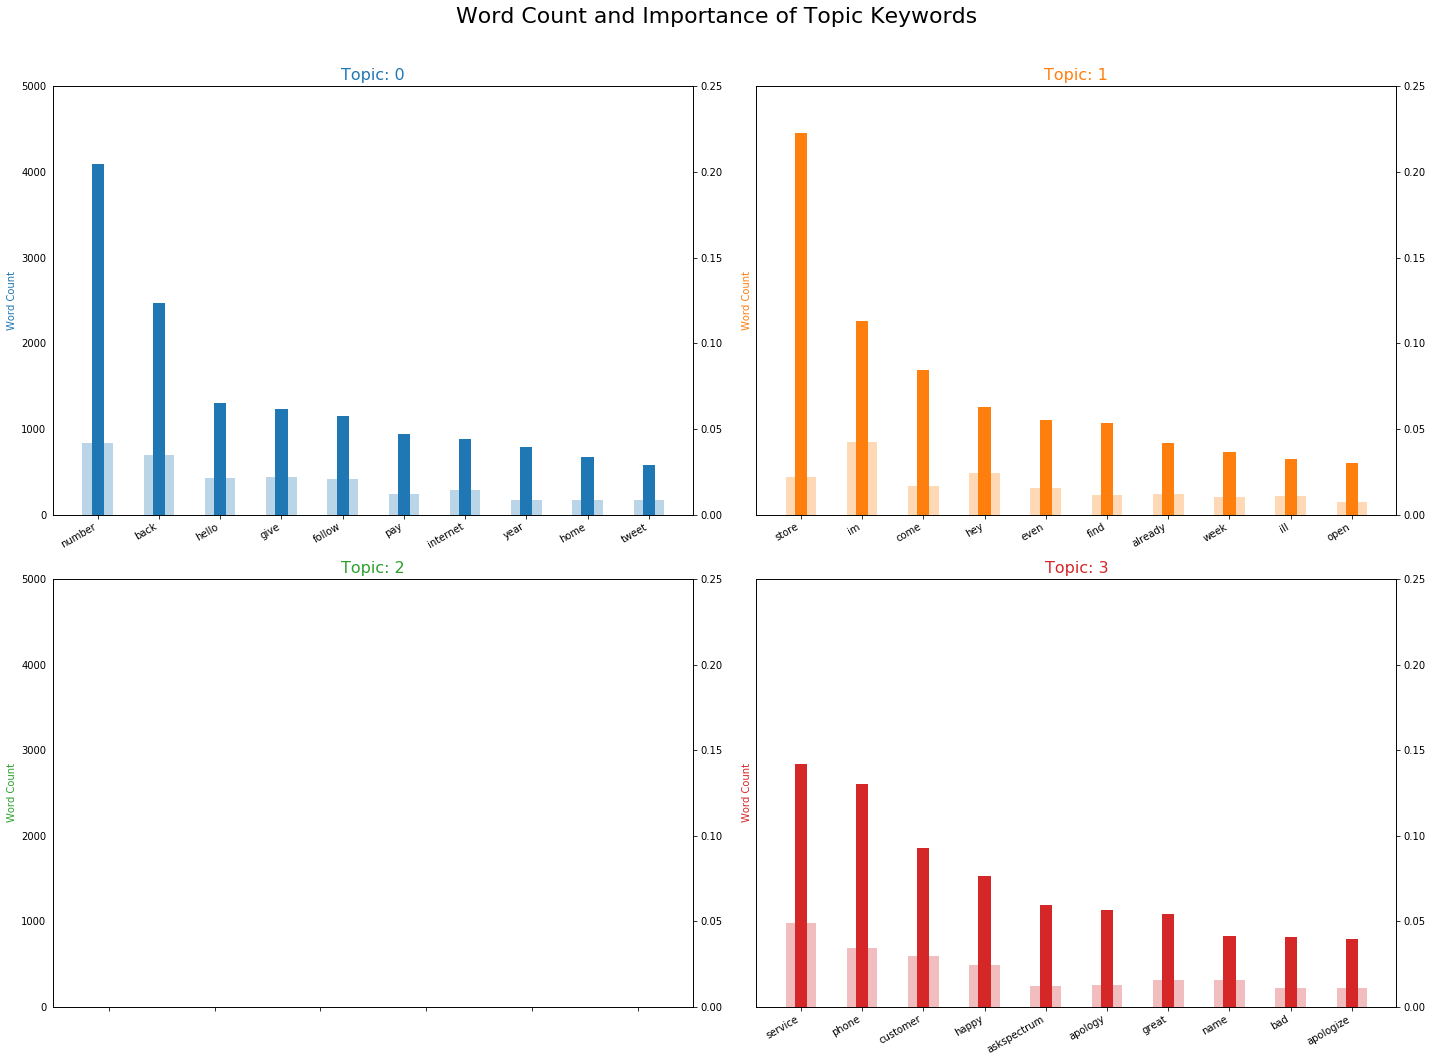

In [99]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(20,14), sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.25); ax.set_ylim(0, 5000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    #ax.legend(loc='upper left')
    #ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()